## Importing Necessary Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split


## Reading & Cleaning Training Data

In [37]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing values in Training Data

In [40]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Plotting Age to see visualize

Imputing Mean on missing age values

C:\Users\acer\AppData\Local\Temp\ipykernel_12124\1591754275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


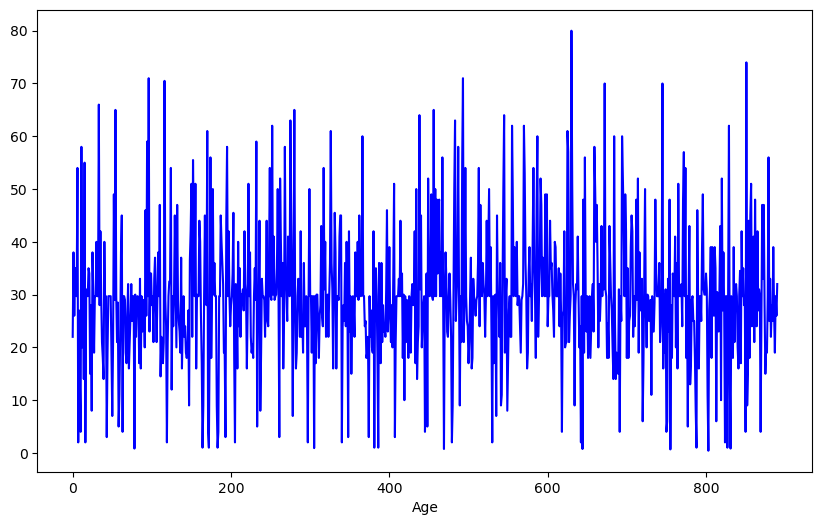

In [41]:
plt.figure(figsize=(10,6))
df['Age'].fillna(df['Age'].mean(), inplace=True)
# lst1 = df['Age'].fillna(df['Age'].mean() , inplace  = True).to_frame()
df['Age'].plot(label="Age", color='blue')
plt.xlabel('Age')
plt.show()

In [42]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Checking Correlations in the training data

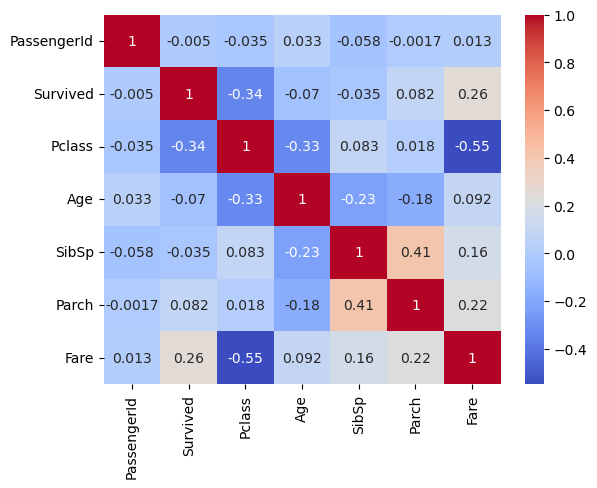

In [43]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()

# Label encoding 'Sex' , 'Embarked' column

In [44]:
lb = LabelEncoder()
df['Sex'] = lb.fit_transform(df['Sex'])
df['Embarked'] = lb.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [45]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Plotting Features

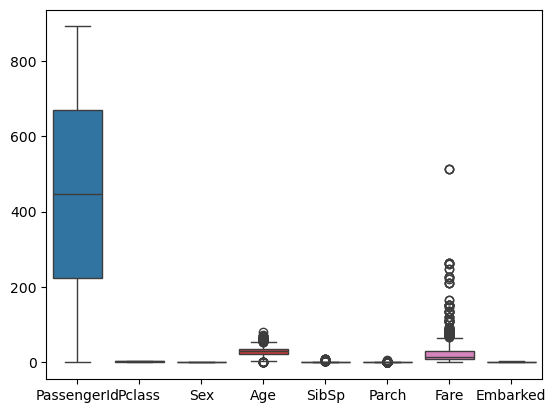

In [46]:
features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']
sns.boxplot(data=df[features])
plt.show()

Age Plotting

<Axes: xlabel='Age'>

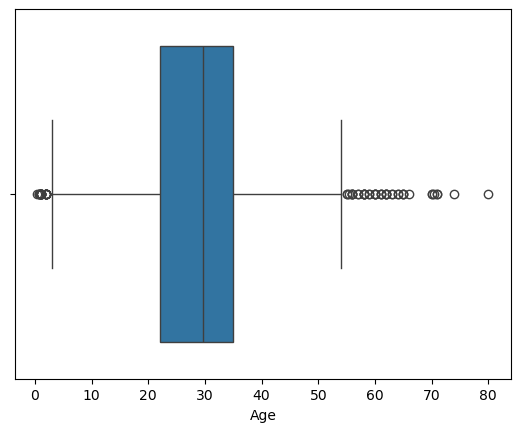

In [47]:
sns.boxplot(x = df['Age'])

# Filteration of Outliers

In [48]:
from scipy import stats

z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
outliers = df[(z_scores > 3).any(axis=1)]
filtered_df = outliers = df[~(z_scores > 3).any(axis=1)]
# print(outliers)
filtered_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [49]:
filtered_df.shape

(820, 12)

In [50]:
df.shape

(891, 12)

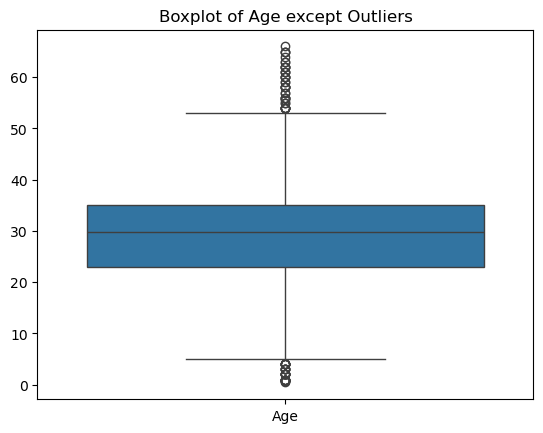

In [51]:
sns.boxplot(data=filtered_df[['Age']])
plt.title("Boxplot of Age except Outliers")
plt.show()


# Plotting Outliers based on z-score

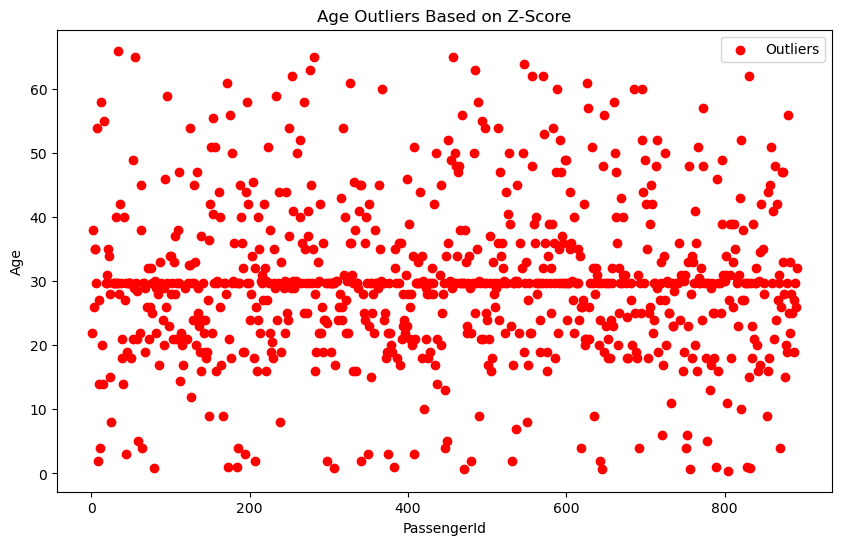

In [52]:
plt.figure(figsize=(10,6))

# normal points
# plt.scatter(df['PassengerId'], df['Age'], label="Normal", alpha=0.5)

# outlier points
plt.scatter(outliers['PassengerId'], outliers['Age'], color='red', label="Outliers")

plt.xlabel("PassengerId")
plt.ylabel("Age")
plt.title("Age Outliers Based on Z-Score")
plt.legend()
plt.show()


# Checking Multicollinearity in the data

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numeric (independent variables)
X = filtered_df.select_dtypes(include=['int64', 'float64']).drop(columns=['Survived'])

# Add constant
from statsmodels.tools.tools import add_constant
X_const = add_constant(X)

# Compute VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

print(vif)


       Feature       VIF
0  PassengerId  1.004713
1       Pclass  2.157520
2          Age  1.243837
3        SibSp  1.176475
4        Parch  1.247921
5         Fare  2.200801


In [54]:
train_x= filtered_df[features]
train_y = filtered_df['Survived']
train_x.shape, train_y.shape

((820, 8), (820,))

In [55]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [57]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)
test_df.isnull().sum()

C:\Users\acer\AppData\Local\Temp\ipykernel_12124\4280410758.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [58]:
filtered_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,445.719512,0.390244,2.310976,0.657317,29.792831,0.348780,0.254878,25.836051,1.542683
std,255.213085,0.488103,0.826678,0.474896,12.151418,0.619434,0.565308,29.817529,0.791828
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,226.750000,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,446.500000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,13.000000,2.000000
75%,661.250000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,27.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,66.000000,3.000000,2.000000,164.866700,3.000000


In [59]:
filtered_df.Pclass.value_counts()   

Pclass
3    447
1    192
2    181
Name: count, dtype: int64

In [60]:
filtered_df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           121
        0            71
2       0            96
        1            85
3       0           333
        1           114
Name: count, dtype: int64

# checking correlation of different features with the target variable

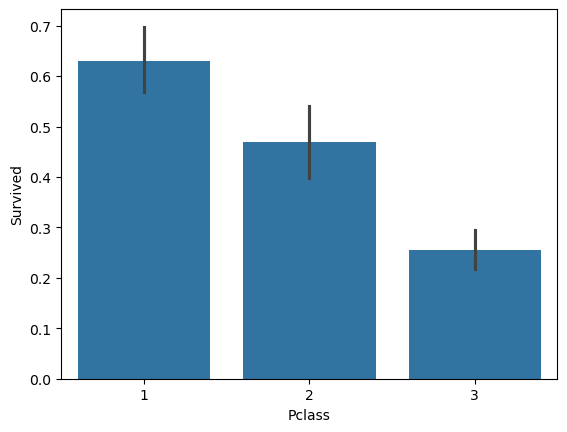

In [61]:
sns.barplot(x='Pclass', y='Survived',data = filtered_df)
plt.show()

In [62]:
filtered_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()


,Sex,Survived
0,0,0.765125
1,1,0.194805


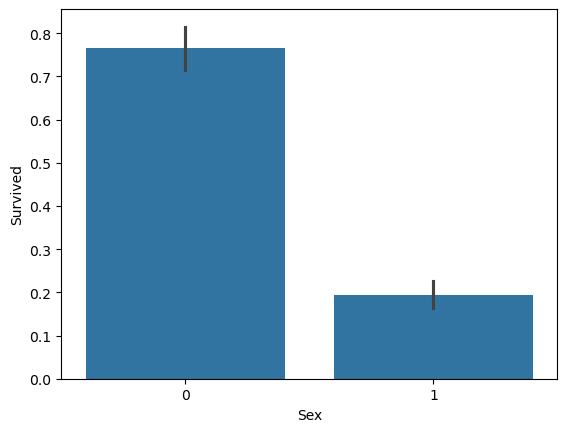

In [63]:
sns.barplot(x='Sex', y='Survived', data=filtered_df)
plt.show()

In [64]:
train_x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [65]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
test_df['Sex'] = lb.fit_transform(test_df['Sex'])
test_df['Embarked'] = lb.fit_transform(test_df['Embarked'])
test  = test_df[features]
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [74]:
test.Embarked.value_counts()
test.Fare.fillna(test.Fare.mean(), inplace=True )

C:\Users\acer\AppData\Local\Temp\ipykernel_12124\3863113396.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Fare.fillna(test.Fare.mean(), inplace=True )
C:\Users\acer\AppData\Local\Temp\ipykernel_12124\3863113396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Fare.fillna(test.Fare.mean(), inplace=True )


# Training of Models

In [75]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [76]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [79]:
x_test = test.drop("PassengerId", axis=1)
train_x = train_x.drop("PassengerId", axis=1)
train_x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [80]:
train_x.shape,train_y.shape, x_test.shape

((820, 7), (820,), (418, 7))

## Logistic Regression

In [81]:
clf = LogisticRegression()
clf.fit(train_x, train_y)
y_pred_log_reg = clf.predict(x_test)
acc_log_reg = round(clf.score(train_x,train_y)*100 ,2)
print(str(acc_log_reg) + "%")

79.63%


c:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Support Vector Machine

In [82]:
clf = SVC()
clf.fit(train_x,train_y)
y_pred_svc = clf.predict(x_test)
acc_svc = round(clf.score(train_x,train_y)*100 ,2)
print(str(acc_svc) + "%")

70.37%


## K Nearest Neighbor Classifier

In [83]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(train_x,train_y)
y_pred_knn = clf.predict(x_test)
acc_knn = round(clf.score(train_x,train_y)*100 ,2)
print(str(acc_knn) + "%")

84.02%


## Decision Tree Classifier

In [84]:
clf = DecisionTreeClassifier()
clf.fit(train_x,train_y)
y_pred_DT = clf.predict(x_test)
acc_DT = round(clf.score(train_x,train_y)*100 ,2)
print(str(acc_DT) + "%")

98.05%


## Random Forest Classifier

In [85]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(train_x,train_y)
y_pred_RF = clf.predict(x_test)
acc_RF = round(clf.score(train_x,train_y)*100 ,2)
print(str(acc_RF) + "%")

98.05%


## Gaussian Naive Baye's Classifier

In [86]:
clf = GaussianNB()
clf.fit(train_x,train_y)
y_pred_GNB = clf.predict(x_test)
acc_GNB = round(clf.score(train_x,train_y)*100 ,2)
print(str(acc_GNB) + "%")

77.68%


## Perceptron

In [87]:
clf = Perceptron()
clf.fit(train_x,train_y)
y_pred_perceptron = clf.predict(x_test)
acc_perceptron = round(clf.score(train_x,train_y)*100 ,2)
print(str(acc_perceptron) + "%")

76.83%


## Stochastic Gradient Descent Classifier

In [88]:
clf = SGDClassifier()
clf.fit(train_x,train_y)
y_pred_sgd = clf.predict(x_test)
acc_sgd = round(clf.score(train_x,train_y)*100 ,2)
print(str(acc_sgd) + "%")

72.8%


In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import itertools

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(train_x,train_y)
y_pred_RF_train = clf.predict(train_x)
acc_RF = round(clf.score(train_x,train_y)*100 ,2)


print ("Accuracy: %i %% \n"%acc_RF)

class_names = ['Survived', 'Not Survived']



cnf_matrix = confusion_matrix(train_y,y_pred_RF_train)
np.set_printoptions(precision = 2)

print("Confusion Matrix in Numbers \n",cnf_matrix)

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis = 1)[:, np.newaxis]

print('Confusion matrix in Percentage \n', cnf_matrix_percent)




Accuracy: 98 % 

Confusion Matrix in Numbers 
 [[494   6]
 [ 10 310]]
Confusion matrix in Percentage 
 [[0.99 0.01]
 [0.03 0.97]]


In [95]:
true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)
print("Confusion Matrix in Numbers\n",df_cnf_matrix)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

print("Confusion Matrix Percentage \n",df_cnf_matrix_percent)

Confusion Matrix in Numbers
                    Predicted Survived  Predicted Not Survived
True Survived                     494                       6
True Not Survived                  10                     310
Confusion Matrix Percentage 
                    Predicted Survived  Predicted Not Survived
True Survived                 0.98800                 0.01200
True Not Survived             0.03125                 0.96875


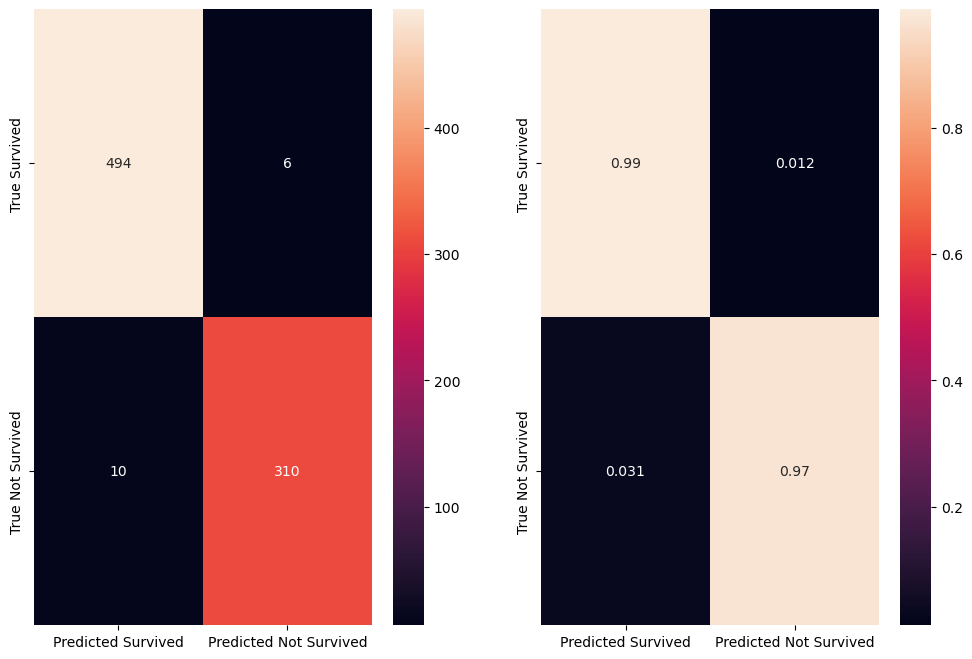

In [96]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.heatmap(df_cnf_matrix,annot = True,fmt = 'd')

plt.subplot(1,2,2)
sns.heatmap(df_cnf_matrix_percent, annot=True)
plt.show()

In [97]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_svc, 
              acc_knn,  acc_DT, acc_RF, acc_GNB, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,98.05
5,Random Forest,98.05
3,KNN,84.02
0,Logistic Regression,79.63
6,Naive Bayes,77.68
7,Perceptron,76.83
8,Stochastic Gradient Decent,72.80
1,Support Vector Machines,70.37
2,Linear SVC,70.37


In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_RF
    })
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [101]:
submission.PassengerId.nunique()

418

In [102]:
submission.to_csv('submission.csv', index=False)